In [45]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [46]:
df = pd.read_csv('mvtWeek1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 11 columns):
ID                     191641 non-null int64
Date                   191641 non-null object
LocationDescription    191641 non-null object
Arrest                 191641 non-null bool
Domestic               191641 non-null bool
Beat                   191641 non-null int64
District               148589 non-null object
CommunityArea          167038 non-null object
Year                   191641 non-null int64
Latitude               189365 non-null float64
Longitude              189365 non-null float64
dtypes: bool(2), float64(2), int64(3), object(4)
memory usage: 13.5+ MB


In [51]:
df.Date = pd.to_datetime(df.Date)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 11 columns):
ID                     191641 non-null int64
Date                   191641 non-null datetime64[ns]
LocationDescription    191641 non-null object
Arrest                 191641 non-null bool
Domestic               191641 non-null bool
Beat                   191641 non-null int64
District               148589 non-null object
CommunityArea          167038 non-null object
Year                   191641 non-null int64
Latitude               189365 non-null float64
Longitude              189365 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 13.5+ MB


In [5]:
df.tail()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
191636,1310068,2001-01-01 00:05:00,STREET,False,False,1123,NaN,NaN,2001,41.887566,-87.711323
191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,41.981924,-87.658878
191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,41.799024,-87.696538
191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,41.971437,-87.727056
191640,1310463,2001-01-01 00:01:00,STREET,False,False,1911,NaN,NaN,2001,41.968327,-87.696388


Problem 1.1 - Loading the Data
How many rows of data (observations) are in this dataset?

In [6]:
df.shape

(191641, 11)

Problem 1.2 - Loading the Data
1 point possible (graded)
How many variables are in this dataset?

In [7]:
len(df.columns)

11

Problem 1.3 - Loading the Data
1 point possible (graded)
Using the "max" function, what is the maximum value of the variable "ID"?



In [8]:
df.ID.max()

9181151

Problem 1.4 - Loading the Data
1 point possible (graded)
What is the minimum value of the variable "Beat"?

In [9]:
df.Beat.min()

111

Problem 1.5 - Loading the Data
1 point possible (graded)
How many observations have value TRUE in the Arrest variable (this is the number of crimes for which an arrest was made)?

In [10]:
df[df.Arrest].shape[0]

15536

Problem 1.6 - Loading the Data
1 point possible (graded)
How many observations have a LocationDescription value of ALLEY?

In [11]:
df[df.LocationDescription=='ALLEY'].shape[0]

2308

Problem 2.1 - Understanding Dates in R
1 point possible (graded)
In many datasets, like this one, you have a date field. Unfortunately, R does not automatically recognize entries that look like dates. We need to use a function in R to extract the date and time. Take a look at the first entry of Date (remember to use square brackets when looking at a certain entry of a variable).

In what format are the entries in the variable Date?

In [12]:
print df.Date.head()
print df.Date.tail()

0   2012-12-31 23:15:00
1   2012-12-31 22:00:00
2   2012-12-31 22:00:00
3   2012-12-31 22:00:00
4   2012-12-31 21:30:00
Name: Date, dtype: datetime64[ns]
191636   2001-01-01 00:05:00
191637   2001-01-01 00:01:00
191638   2001-01-01 00:01:00
191639   2001-01-01 00:01:00
191640   2001-01-01 00:01:00
Name: Date, dtype: datetime64[ns]


Problem 2.2 - Understanding Dates in R
1 point possible (graded)
Now, let's convert these characters into a Date object in R. In your R console, type

DateConvert = as.Date(strptime(mvt$Date, "%m/%d/%y %H:%M"))

This converts the variable "Date" into a Date object in R. Take a look at the variable DateConvert using the summary function.

What is the month and year of the median date in our dataset? Enter your answer as "Month Year", without the quotes. (Ex: if the answer was 2008-03-28, you would give the answer "March 2008", without the quotes.)

In [13]:
df.ix[df.shape[0]/2].Date

Timestamp('2006-05-21 12:30:00')

Problem 2.3 - Understanding Dates in R
1 point possible (graded)
Now, let's extract the month and the day of the week, and add these variables to our data frame mvt. We can do this with two simple functions. Type the following commands in R:

mvt$Month = months(DateConvert)

mvt$Weekday = weekdays(DateConvert)

This creates two new variables in our data frame, Month and Weekday, and sets them equal to the month and weekday values that we can extract from the Date object. Lastly, replace the old Date variable with DateConvert by typing:

mvt$Date = DateConvert

Using the table command, answer the following questions.

In which month did the fewest motor vehicle thefts occur?



In [35]:
df['Month']=df.Date.dt.strftime('%b')

In [15]:
df.groupby('Month').count()['ID'].argmin()

'Feb'

Problem 2.4 - Understanding Dates in R
1 point possible (graded)
On which weekday did the most motor vehicle thefts occur?

In [16]:
df['Weekday']=df.Date.dt.strftime('%A')
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month,Weekday
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,41.756284,-87.621645,Dec,Monday
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,41.898788,-87.661303,Dec,Monday
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,41.969186,-87.767670,Dec,Monday
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,41.769329,-87.657726,Dec,Monday
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,41.837568,-87.621761,Dec,Monday


In [17]:
df.groupby('Weekday')['ID'].count().argmax()

'Friday'

Problem 2.5 - Understanding Dates in R
1 point possible (graded)
Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made?



In [18]:
df[df.Arrest].groupby('Month').count()['ID'].argmax()

'Jan'

Problem 3.1 - Visualizing Crime Trends
3 points possible (graded)
Now, let's make some plots to help us better understand how crime has changed over time in Chicago. Throughout this problem, and in general, you can save your plot to a file. For more information, this website very clearly explains the process.

First, let's make a histogram of the variable Date. We'll add an extra argument, to specify the number of bars we want in our histogram. In your R console, type

hist(mvt$Date, breaks=100)

Looking at the histogram, answer the following questions.

In general, does it look like crime increases or decreases from 2002 - 2012?

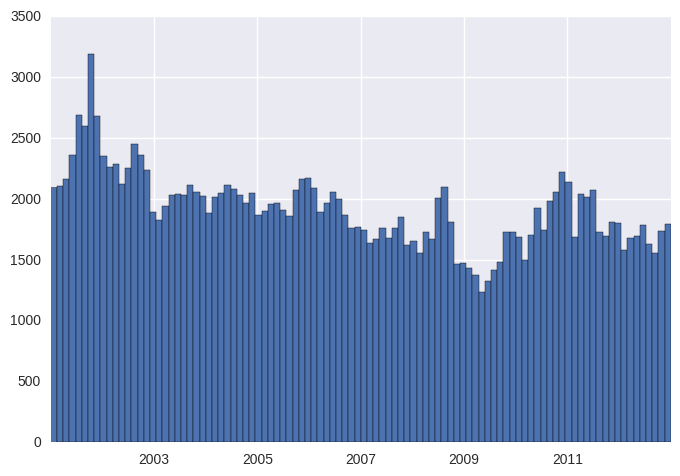

In [19]:
df.Date.hist(bins=100)

Problem 3.2 - Visualizing Crime Trends
1 point possible (graded)
Now, let's see how arrests have changed over time. Create a boxplot of the variable "Date", sorted by the variable "Arrest" (if you are not familiar with boxplots and would like to learn more, check out this tutorial). In a boxplot, the bold horizontal line is the median value of the data, the box shows the range of values between the first quartile and third quartile, and the whiskers (the dotted lines extending outside the box) show the minimum and maximum values, excluding any outliers (which are plotted as circles). Outliers are defined by first computing the difference between the first and third quartile values, or the height of the box. This number is called the Inter-Quartile Range (IQR). Any point that is greater than the third quartile plus the IQR or less than the first quartile minus the IQR is considered an outlier.

Does it look like there were more crimes for which arrests were made in the first half of the time period or the second half of the time period? (Note that the time period is from 2001 to 2012, so the middle of the time period is the beginning of 2007.)

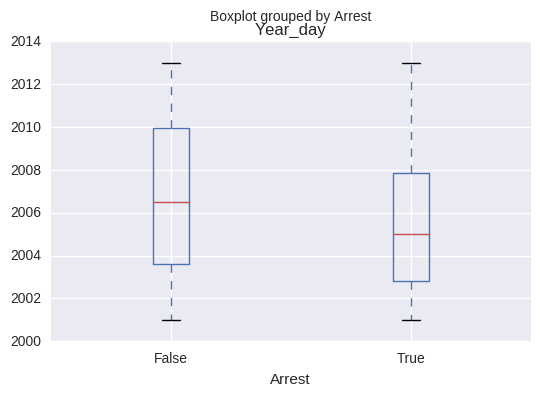

In [84]:
df['Year_day']=df.Year+df.Date.dt.dayofyear/365

df.reset_index().boxplot(['Year_day'], by='Arrest')